### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("..")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/27-02-24/20240226_tensile_KP_8armMal_NC_100strand_output.xlsx")
df.head(6)

,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,MPa/%,g,g,mm,%,NaN,NaN,NaN,NaN
1,NaN,Gradient St-Strain 1:2,Yield Force,Break force,Distance to Break,Break Strain,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20240226_bleach_KP_,50.683,41.33,110.004,-26.915,55.461,50.0,54.0,breakend,23.8
4,20240226_bleach_KP_,44.309,54.961,75.591,-22.476,46.235,42.0,42.0,ok,NaN
5,20240226_bleach_KP_,48.422,64.408,99.857,-27.903,58.445,50.0,51.0,slip,NaN


In [4]:
TYPE = "Break force"

In [5]:
df = df.rename(columns={'Unnamed: 6': 'Diameter 1', 
                        'Unnamed: 7': 'Diameter 2',
                        'Unnamed: 8': 'Note',
                        'Unnamed: 9': 'Humidity',})
df.head(2)

,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note,Humidity
0,NaN,MPa/%,g,g,mm,%,NaN,NaN,NaN,NaN
1,NaN,Gradient St-Strain 1:2,Yield Force,Break force,Distance to Break,Break Strain,NaN,NaN,NaN,NaN


In [6]:
df = df.drop('Humidity', axis=1)
df.head(2)

,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note
0,NaN,MPa/%,g,g,mm,%,NaN,NaN,NaN
1,NaN,Gradient St-Strain 1:2,Yield Force,Break force,Distance to Break,Break Strain,NaN,NaN,NaN


In [7]:
df = df.dropna()
df.head(2)

,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note
3,20240226_bleach_KP_,50.683,41.33,110.004,-26.915,55.461,50.0,54.0,breakend
4,20240226_bleach_KP_,44.309,54.961,75.591,-22.476,46.235,42.0,42.0,ok


In [8]:
df['Break force'] = df['Break force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
#df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
#df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note
3,20240226_bleach_KP_,50.683,41.33,110.004,-26.915,55.461,50.0,54.0,breakend
4,20240226_bleach_KP_,44.309,54.961,75.591,-22.476,46.235,42.0,42.0,ok


In [9]:
#df = df[df['Test ID'] != 'Average:']
#df = df[df['Test ID'] != 'S.D.']
#df = df[df['Test ID'] != 'Coef. of Variation']

In [10]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [11]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [12]:
df['Break stress'] = df['Break force'] / df['Area'] / 1000

In [13]:
df.head(2)

,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note,Average,Area,Baseline area,Updated Young's Modulus,Break stress
3,20240226_bleach_KP_,50.683,41.33,110.004,-26.915,55.461,50.0,54.0,breakend,0.052,0.002124,0.003848,91.844194,51.797871
4,20240226_bleach_KP_,44.309,54.961,75.591,-22.476,46.235,42.0,42.0,ok,0.042,0.001385,0.003848,123.080556,54.560913


In [14]:
len(df)

300

<Figure size 1000x600 with 0 Axes>

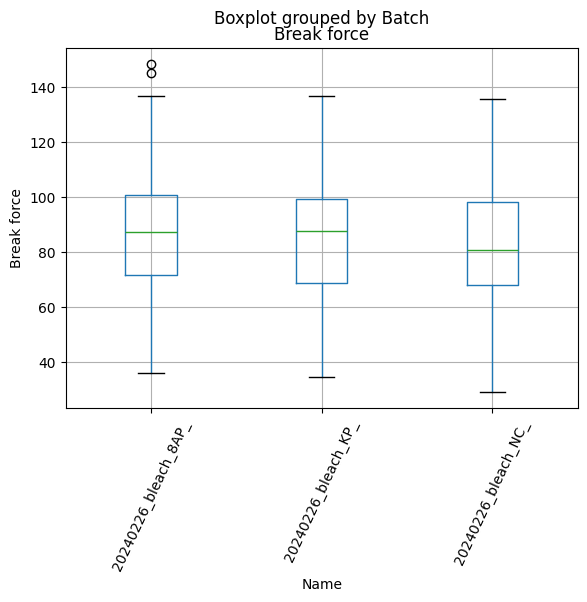

In [15]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=TYPE, by='Batch')
    plt.xlabel('Name')
    plt.ylabel(TYPE)
    plt.xticks(rotation=65)
    ## y axis from 20 to 90
    #plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [16]:
std_by_batch_all = df.groupby('Batch')[TYPE].std()
print(std_by_batch_all)

Batch
20240226_bleach_8AP_    22.641234
20240226_bleach_KP_     23.396075
20240226_bleach_NC_     22.260583
Name: Break force, dtype: float64


In [17]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                      20240226_bleach_KP_  20240226_bleach_8AP_  \
 20240226_bleach_KP_                 1.000                 0.569   
 20240226_bleach_8AP_                0.569                 1.000   
 20240226_bleach_NC_                 0.269                 0.077   
 
                       20240226_bleach_NC_  
 20240226_bleach_KP_                 0.269  
 20240226_bleach_8AP_                0.077  
 20240226_bleach_NC_                 1.000  ,
                       20240226_bleach_KP_  20240226_bleach_8AP_  \
 20240226_bleach_KP_                 -1.00                996.52   
 20240226_bleach_8AP_               996.52                 -1.00   
 20240226_bleach_NC_                831.87                218.62   
 
                       20240226_bleach_NC_  
 20240226_bleach_KP_                831.87  
 20240226_bleach_8AP_               218.62  
 20240226_bleach_NC_                 -1.00  )

In [18]:
unique_values = df['Note'].unique()
print(unique_values)

['breakend' 'ok' 'slip' 'short' 'breakend, slip' 'almost breakend' 'ok!'
 'okkk' 'OK' 'ALMOST BREAKEND' 'early-weakness' 'breakend, earlyish '
 'great' 'ok but short' 'early' 'earlyish' 'ok ' 'breakend earlyish']


let's remove all but ok

In [19]:
len(df)

300

In [20]:
count_by_batch = df['Batch'].value_counts()
print(count_by_batch)

Batch
20240226_bleach_KP_     100
20240226_bleach_8AP_    100
20240226_bleach_NC_     100
Name: count, dtype: int64


In [21]:
df = df[df['Note'].isin(['ok', 'ok!', 'okkk', 'OK', 'good', 'great', 'ok '])]
len(df)

138

In [22]:
count_by_batch = df['Batch'].value_counts()
print(count_by_batch)

Batch
20240226_bleach_KP_     46
20240226_bleach_8AP_    46
20240226_bleach_NC_     46
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

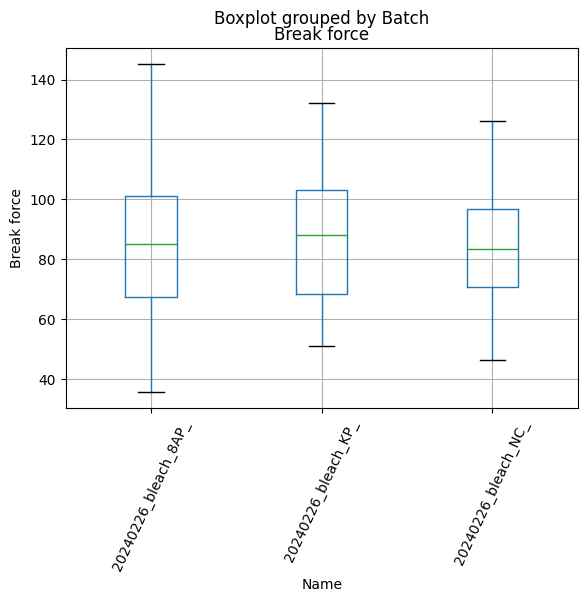

In [23]:
do_plot(df)

In [24]:
std_by_batch_ok = df.groupby('Batch')[TYPE].std()
print(std_by_batch_ok)

Batch
20240226_bleach_8AP_    24.599931
20240226_bleach_KP_     22.391421
20240226_bleach_NC_     19.101223
Name: Break force, dtype: float64


In [25]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240226_bleach_8AP_,22.641234,24.599931
20240226_bleach_KP_,23.396075,22.391421
20240226_bleach_NC_,22.260583,19.101223


In [26]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                      20240226_bleach_KP_  20240226_bleach_8AP_  \
 20240226_bleach_KP_                 1.000                 0.782   
 20240226_bleach_8AP_                0.782                 1.000   
 20240226_bleach_NC_                 0.569                 0.818   
 
                       20240226_bleach_NC_  
 20240226_bleach_KP_                 0.569  
 20240226_bleach_8AP_                0.818  
 20240226_bleach_NC_                 1.000  ,
                       20240226_bleach_KP_  20240226_bleach_8AP_  \
 20240226_bleach_KP_                 -1.00               6239.55   
 20240226_bleach_8AP_              6239.55                 -1.00   
 20240226_bleach_NC_                646.43               1785.31   
 
                       20240226_bleach_NC_  
 20240226_bleach_KP_                646.43  
 20240226_bleach_8AP_              1785.31  
 20240226_bleach_NC_                 -1.00  )

more check

In [27]:
bio = df.groupby('Batch')[TYPE].mean()
print(bio)

Batch
20240226_bleach_8AP_    85.793065
20240226_bleach_KP_     86.972957
20240226_bleach_NC_     83.727435
Name: Break force, dtype: float64


In [28]:
bio = df.groupby('Batch')[TYPE].median()
print(bio)

Batch
20240226_bleach_8AP_    85.266
20240226_bleach_KP_     88.049
20240226_bleach_NC_     83.290
Name: Break force, dtype: float64
